In [32]:
import pylidc as pl
import numpy as np
import matplotlib.pyplot as plt
import os
from pylidc.utils import volume_viewerviewer

## Scans

In [86]:
# Query for all CT scans with desired traits.
# scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1,pl.Scan.pixel_spacing <= 0.6)
# print (scans)
# print(scans.count())
# => 31

pid = 'LIDC-IDRI-0001'
# scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).get
print (scan)

<bound method Query.get of <sqlalchemy.orm.query.Query object at 0x7f735c9d6780>>


## Annotations

In [43]:
annotation = pl.query(pl.Annotation)

print (annotation)

SELECT annotations.id AS annotations_id, annotations.scan_id AS annotations_scan_id, annotations._nodule_id AS annotations__nodule_id, annotations.subtlety AS annotations_subtlety, annotations."internalStructure" AS "annotations_internalStructure", annotations.calcification AS annotations_calcification, annotations.sphericity AS annotations_sphericity, annotations.margin AS annotations_margin, annotations.lobulation AS annotations_lobulation, annotations.spiculation AS annotations_spiculation, annotations.texture AS annotations_texture, annotations.malignancy AS annotations_malignancy 
FROM annotations


In [85]:
# method dir
# for x in dir(scans):
#     print (x), ':', type(eval("scans."+x))

q = pl.query(pl.Scan)
for x in dir(scan):
    print (x), ':', type(eval("scan."+x))

_Query__all_equivs
__class__
__clause_element__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_adapt_all_clauses
_adapt_clause
_adapt_col_list
_adapt_polymorphic_element
_adjust_for_single_inheritance
_attributes
_autoflush
_bake_ok
_bind_mapper
_clone
_compile_context
_compound_eager_statement
_conditional_options
_connection_from_session
_correlate
_criterion
_current_path
_distinct
_enable_assertions
_enable_eagerloads
_enable_single_crit
_entities
_entity_zero
_execute_and_instances
_execute_crud
_execution_options
_filter_aliases
_for_update_arg
_from_obj
_from_obj_alias
_from_selectable
_get_bind_args
_get_condition
_get_existing_condition
_get_impl
_get_options
_group_by
_has_mapper_entities
_having
_identity_lookup
_invoke_all_eagers
_join
_join_check

In [12]:
print(len(scan.annotations))

4


In [13]:
nods = scan.cluster_annotations()

print("%s has %d nodules." % (scan, len(nods)))
# => Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))
# => Nodule 1 has 4 annotations.
# => Nodule 2 has 4 annotations.
# => Nodule 3 has 1 annotations.
# => Nodule 4 has 4 annotations.

Scan(id=12,patient_id=LIDC-IDRI-0001) has 1 nodules.
Nodule 1 has 4 annotations.


In [14]:
vol = scan.to_volume()
print(vol.shape)
# => (512, 512, 87)

print("%.2f, %.2f" % (vol.mean(), vol.std()))
# => -702.15, 812.52

Loading dicom files ... This may take a moment.
(512, 512, 133)
-826.94, 773.40


Loading dicom files ... This may take a moment.


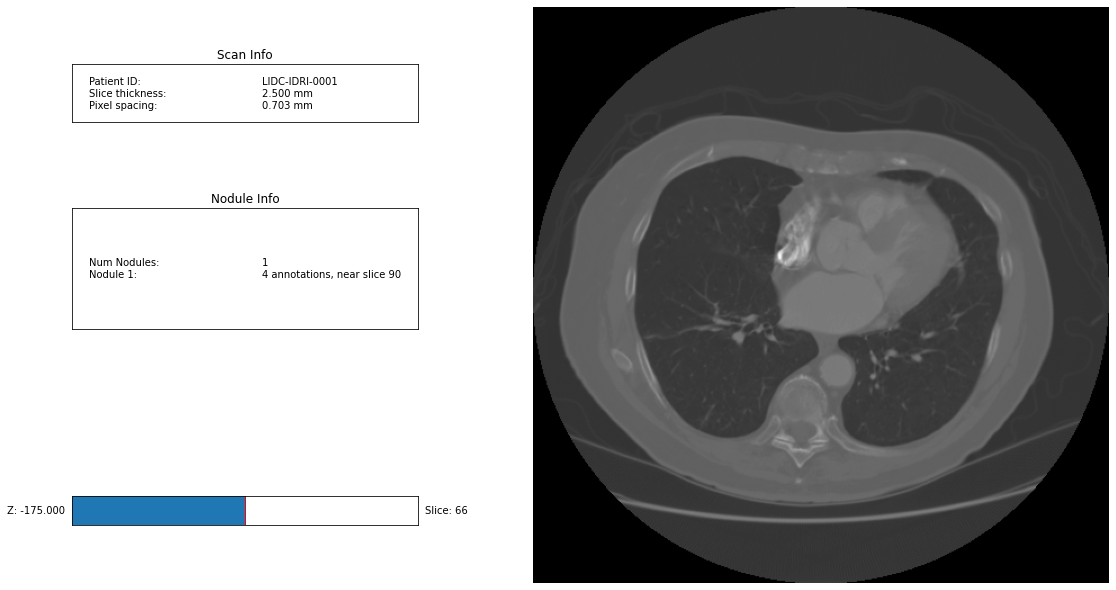

In [15]:
scan.visualize(annotation_groups=nods)

In [30]:
# ann = pl.query(pl.Annotation).first()
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
scan_pid = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid)
ann = pl.query(pl.Annotation)
# ann = pl.query(pl.Annotation)
# ann = pl.query(pl.Annotation).filter(pl.Scan.patient_id == pid).first()
# ann.visualize_in_scan()
# ann.visualize(annotation_groups=node)
print (scan)
print ('===========')
print (scan_pid)
print ('===========')
print (ann)

Scan(id=12,patient_id=LIDC-IDRI-0001)
SELECT scans.id AS scans_id, scans.study_instance_uid AS scans_study_instance_uid, scans.series_instance_uid AS scans_series_instance_uid, scans.patient_id AS scans_patient_id, scans.slice_thickness AS scans_slice_thickness, scans.pixel_spacing AS scans_pixel_spacing, scans.contrast_used AS scans_contrast_used, scans.is_from_initial AS scans_is_from_initial, scans.sorted_dicom_file_names AS scans_sorted_dicom_file_names 
FROM scans 
WHERE scans.patient_id = ?
SELECT annotations.id AS annotations_id, annotations.scan_id AS annotations_scan_id, annotations._nodule_id AS annotations__nodule_id, annotations.subtlety AS annotations_subtlety, annotations."internalStructure" AS "annotations_internalStructure", annotations.calcification AS annotations_calcification, annotations.sphericity AS annotations_sphericity, annotations.margin AS annotations_margin, annotations.lobulation AS annotations_lobulation, annotations.spiculation AS annotations_spiculation,

<class 'numpy.ndarray'>
(34, 27, 6)


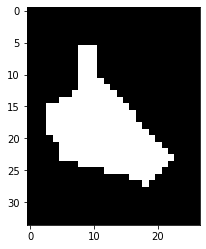

In [27]:
mask = ann.boolean_mask()
print (type(mask))
print (mask.shape)
plt.imshow(mask[:,:,0], cmap = "gray")

Loading dicom files ... This may take a moment.
<class 'numpy.ndarray'>
k: 47 ii: [182 181 181 180 180 180 179 178 177 176 175 174 173 172 171 170 169 168
 167 166 165 164 163 162 161 161 160 160 160 160 160 159 159 158 158 158
 158 158 159 160 160 160 160 161 162 163 164 165 166 166 167 168 168 169
 170 171 172 173 174 175 176 177 178 179 179 179 180 181 181 181 181 182] jj: [361 362 363 364 365 366 367 368 368 368 368 369 369 369 370 370 370 371
 371 371 371 371 372 372 372 371 370 369 368 367 366 365 364 363 362 361
 360 359 358 357 356 355 354 353 353 352 352 351 350 349 349 349 350 351
 351 351 351 351 351 351 352 352 352 353 354 355 356 357 358 359 360 361]


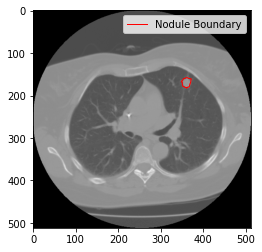

In [115]:
a = 2
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()
print (type(vol))
con = ann.contours[a]
k = con.image_k_position
ii,jj = ann.contours[a].to_matrix(include_k=False).T
print ('k:',k, 'ii:', ii, 'jj:',jj)
plt.imshow(vol[:,:,46], cmap=plt.cm.gray)
plt.plot(jj, ii, '-r', lw=1, label="Nodule Boundary")
plt.legend()
plt.show()

In [117]:
mask = ann.boolean_mask()
plt.imshow(mask[:,:,46], cmap = "gray")

IndexError: index 46 is out of bounds for axis 2 with size 6

Loading dicom files ... This may take a moment.
(slice(113, 223, None), slice(308, 417, None), slice(34, 60, None))


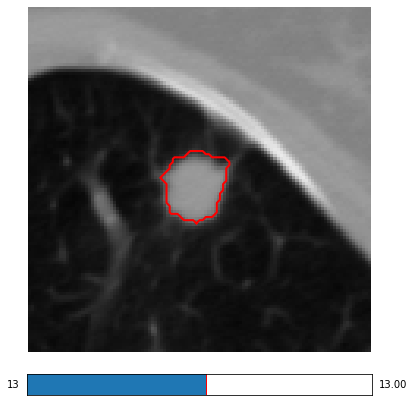

In [124]:
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()
padding = 70.0
mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)
print (bbox)
volume_viewer(vol[bbox], mask, ls='-', lw=2, c='r')